In [2]:
import numpy as np, matplotlib.pyplot as plt
from Reg_class import Polyfit, train_test_split, FrankeFunction, DesignMatrix

n = 70
p = 4
k = 5
res = 11 # nr. of lambdas to test
x = np.sort(np.random.rand(n))
y = np.sort(np.random.rand(n))

x, y = np.meshgrid(x, y)

noise = 0.2*np.random.randn(n, n)

z = FrankeFunction(x, y) + noise


x, y, z = x.reshape(n**2, 1), y.reshape(n**2, 1), z.reshape(n**2, 1)



In [5]:
from sklearn.model_selection import KFold
from Reg_class import Polyfit

lambdas = np.linspace(1e-7, 1e-2, res)
betas = np.empty((res, (p+1)**2))
kfold = KFold(n_splits = k,shuffle=True,random_state=5)


err = np.empty(res)
bias = np.empty(res)
var = np.empty(res)
reg = Polyfit()
for i in range(len(lambdas)):
    zpred = np.empty((int(n**2/k), k))
    j=0

    for train_ind,test_ind in kfold.split(x):
        Xtrain = DesignMatrix(x[train_ind], y[train_ind], p)
        betas[i, :] = reg.fit(Xtrain, z[train_ind], 'lasso', lm=lambdas[i])[0].ravel()
        Xtest = DesignMatrix(x[test_ind], y[test_ind], p)
        ztest = z[test_ind]
        zpred[:,j] = reg.predict(Xtest).ravel()
        j+=1
    
    err[i] = np.mean( np.mean((ztest - zpred)**2, axis=1, keepdims=True) )
    bias[i] = np.mean( (ztest - np.mean(zpred, axis=1, keepdims=True))**2 )
    var[i] = np.mean( np.var(zpred, axis=1, keepdims=True) )





/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

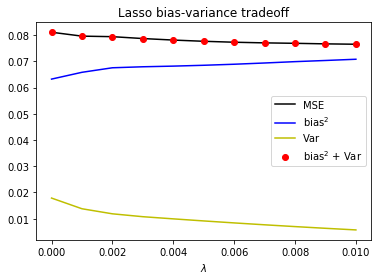

In [8]:
plt.figure()
plt.plot(lambdas,err,'k',label='MSE')
plt.plot(lambdas,bias,'b',label=r'bias$^2$')
plt.plot(lambdas,var,'y',label='Var')

plt.plot(lambdas, var + bias ,'ro',label=r'bias$^2$ + Var')

plt.xlabel(r'$\lambda$')
plt.legend()
plt.title('Lasso bias-variance tradeoff')
plt.savefig('lasso_bvt.pdf')
plt.show()



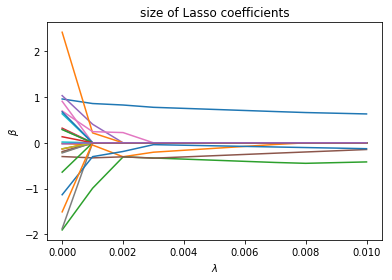

In [9]:
for i in range((p+1)**2):
    plt.plot(lambdas, betas[:, i])    
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\beta$')
plt.title('size of Lasso coefficients')
plt.savefig('lasso_coeffs.pdf')
plt.show()